# Mercedes-Benz Greener Manufacturing Project

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

Check for null and unique values for test and train sets.

Apply label encoder.

Perform dimensionality reduction.

Predict your test_df values using XGBoost.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
merc=pd.read_csv("C:/Users/ASHISH ROY/Desktop/Project for submi/train.csv")      #importing dataset

In [3]:
merc.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
merc.shape

(4209, 378)

we have 4209 rows and 378 columns

In [5]:
merc.describe()                            #summary statistics 

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
merctest=pd.read_csv("C:/Users/ASHISH ROY/Desktop/Project for submi/test.csv")       #importing dataset2

In [7]:
merctest.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


(merc = train dataset, merctest = test dataset)

In [8]:
merctest.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
type(merc)

pandas.core.frame.DataFrame

In [10]:
merc.isnull()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
merc.info()                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [12]:
merc.isnull().sum()                        #checking for total number of null values

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [13]:
merc_target = merc["y"]
merc_drop = merc.drop(["y","ID"],axis=1)            #dropping unnesessary columns

In [14]:
merc_drop                                           #checking train data after dropping column

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
merc_drop.var()                                      #checking for variance

X10     0.013131
X11     0.000000
X12     0.069457
X13     0.054623
X14     0.244893
          ...   
X380    0.008015
X382    0.007547
X383    0.001661
X384    0.000475
X385    0.001424
Length: 368, dtype: float64

In [16]:
merc_drop.var().sort_values()                       #sorting values after calculating variance

X330    0.000000
X297    0.000000
X268    0.000000
X290    0.000000
X235    0.000000
          ...   
X194    0.248764
X191    0.249212
X362    0.249647
X337    0.249787
X127    0.250036
Length: 368, dtype: float64

In [17]:
merc_drop.var().sort_values().head(20)

X330    0.000000
X297    0.000000
X268    0.000000
X290    0.000000
X235    0.000000
X347    0.000000
X107    0.000000
X233    0.000000
X289    0.000000
X93     0.000000
X11     0.000000
X293    0.000000
X257    0.000238
X207    0.000238
X280    0.000238
X288    0.000238
X39     0.000238
X33     0.000238
X190    0.000238
X270    0.000238
dtype: float64

In [18]:
from sklearn.feature_selection import VarianceThreshold                   #droping all the variance 0 variable
variance = VarianceThreshold(threshold=0)

In [19]:
merc_non_zero_var = variance.fit_transform(merc_drop.iloc[:,9:])           #data with no zero variance

In [20]:
merc_non_zero_var

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
merc_labeled=merc_drop.iloc[:,0:8]
merc_labeled.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [22]:
merc_labeled.nunique()             #number of unique values in columns

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

## Applying label encoder

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
merc_labeled2= merc_labeled.apply(LabelEncoder().fit_transform)
merc_labeled2

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [25]:
merc_labeled2.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [26]:
merc_labeled2.var()                     #again checking variance after applying label encoder

X0    188.741938
X1     72.777974
X2    118.808135
X3      3.027295
X4      0.005461
X5     68.076236
X6      8.508730
X8     49.531868
dtype: float64

In [27]:
merc_final_nonzero_var_data= pd.DataFrame(merc_non_zero_var)
merc_final_nonzero_var_data                                    

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
merc_final_nonzero_var_data.head()                    #final train data with no zero variance

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
merc_final_data=pd.concat([merc_labeled2,merc_final_nonzero_var_data],axis=1)    #linking labeled data and final train data together

In [30]:
merc_final_data                                  #FINAL TRAIN DATA

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,32,23,17,0,3,24,9,14,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,1,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
merc_final_data.head()                             #first five rows of final train data

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,32,23,17,0,3,24,9,14,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
merc_final_data.isnull()

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
merc_final_data.isnull().any()                      #no null values in final train data

X0     False
X1     False
X2     False
X3     False
X4     False
       ...  
350    False
351    False
352    False
353    False
354    False
Length: 363, dtype: bool

In [34]:
merctest.head()                                       #first five rows of test data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
merctest=merctest.drop(['ID'],axis=1)                  #dropping unnecessary column from test data

In [36]:
merctest.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
merctest.nunique()                       #number of unique values in columns of test data

X0      49
X1      27
X2      45
X3       7
X4       4
        ..
X380     2
X382     2
X383     2
X384     2
X385     2
Length: 376, dtype: int64

In [38]:
merctest.isnull()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
merctest.isnull().any()                                #checking for null values in test data

X0      False
X1      False
X2      False
X3      False
X4      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 376, dtype: bool

In [40]:
merctest.var().sort_values().head(20)

X295    0.000000
X369    0.000000
X296    0.000000
X257    0.000000
X258    0.000000
X278    0.000238
X233    0.000238
X280    0.000238
X290    0.000238
X293    0.000238
X330    0.000238
X235    0.000238
X288    0.000238
X210    0.000238
X297    0.000238
X105    0.000238
X124    0.000238
X259    0.000238
X372    0.000238
X190    0.000238
dtype: float64

In [41]:
merctest_non_zero_var= variance.transform(merctest.iloc[:,9:])          #again we are doing the same operations for test data as we did it for train data

In [42]:
merctest_non_zero_var

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
merctest_final_nonzero_var_data = pd.DataFrame(merctest_non_zero_var)
merctest_final_nonzero_var_data                                            #train data with no zero variance

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
merctest_labeled=merctest.iloc[:,0:8]
merctest_labeled.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [45]:
merctest_labeled2= merctest_labeled.apply(LabelEncoder().fit_transform)
merctest_labeled2.head()                                                             #applying label encoder

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12


In [46]:
merctest_final= pd.concat([merctest_labeled2, merctest_final_nonzero_var_data],axis=1)
merctest_final.head()                                                      

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


## Dimensionality reduction

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(merc_final_data,merc_target, random_state=42, test_size=0.3)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2946, 363), (1263, 363), (2946,), (1263,))

In [50]:
#we can see the resulting shape,it splitted the training data and test data in the ratio of 70:30 i.e., 70% of train data and 30% of test data

In [51]:
from sklearn.decomposition import PCA

In [52]:
from sklearn import linear_model

In [53]:
pca= PCA(n_components=2)

In [54]:
x_train= pca.fit_transform(x_train)
x_test= pca.transform(x_test)
merctest_final= pca.transform(merctest_final)

In [55]:
merctest_final

array([[ 15.03519343,  13.06406156],
       [-16.20935121,  -5.6610784 ],
       [ 11.50558909,  -1.59336501],
       ...,
       [-13.21653613,   4.78060127],
       [ 24.30808923,  -5.84467559],
       [-16.28432088,  -5.21629451]])

## Predict your test_df values using XGBoost

In [56]:
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
xgbreg= XGBRegressor(random_state=42)

In [57]:
model= xgbreg.fit(x_train, y_train)                   #fit model on training data

In [58]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
score=xgbreg.score(x_train,y_train)
score                                                   #for checking training score

0.8129729122123084

In [60]:
ypred_test= model.predict(x_test)                       #we can now predict the test data by using training model
ypred_test

array([ 89.92478,  92.23022, 106.76723, ...,  93.1157 , 100.5901 ,
       107.29518], dtype=float32)

In [61]:
ypred_train= model.predict(x_train)
ypred_train

array([ 93.82634 , 111.754364, 109.68195 , ...,  99.46664 ,  93.587746,
        94.289566], dtype=float32)

In [62]:
print(r2_score(ypred_train,y_train))                        #checking accuracy rate

0.6854826904515524


In [63]:
print(mean_squared_error(ypred_train,y_train))              #checking accuracy rate

28.587957391170832


In [64]:
mercedes_test_data_final_prediction= model.predict(merctest_final)

In [65]:
mercedes_test_data_final_prediction

array([ 77.99635,  99.1812 ,  85.87772, ...,  97.91183, 104.14606,
        98.42231], dtype=float32)

In [66]:
Prediction= pd.DataFrame({'ytest':y_test,'ypred':ypred_test})

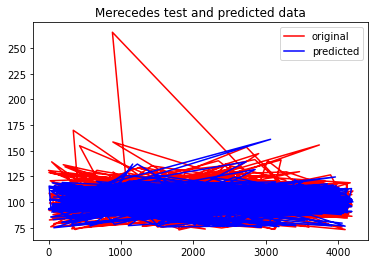

In [67]:
plt.plot(Prediction['ytest'],color='red', label="original")
plt.plot(Prediction['ypred'],color='blue',label="predicted")
plt.legend()
plt.title("Merecedes test and predicted data")
plt.show()